<center> <h1>
    Inteligencia Artificial
</h1> </center>
<center> <h1>
    Proyecto de Curso: Diagnostico de cáncer de seno
</h1> </center>
<center><h2>
    Mayo 15 de 2019
</center></h2> 

Alejandro Hernán

El cáncer de seno (o de mama) se da cuando las células en el seno empiezan a crecer en forma descontrolada, formando normalmente un tumor que se detecta por medio de una radiografiá o con el tacto siendo similar a una masa o bulto. Este tumor es maligno (cáncer) si las células siguen creciendo y comienzan a invadir tejidos cercanos o haciendo metástasis(propagándose) a diferentes áreas del cuerpo. Este cáncer es más frecuentes en mujeres, aunque también los hombres lo pueden padecer. La mayoría de casos se diagnostica en mujeres entre los 35 y 85 años de edad, pero la franja con más riesgo es entre los 45 y 65 años.

El diagnostico precoz de esta enfermedad es una de las mejores herramientas para luchar contra ella, debido que si el tumor se detecta en etapas tempranas es posible aplicar medicamentos menos agresivos que reducen las secuelas físicas y psicológicas en la mujer.

El uso de sistemas inteligentes para diagnosticar enfermedades sé está usando como un suporte para el medico
a la hora de tomar una decisión, en este caso se busca detectar en el paciente con una mayor exactitud si el tumor que ya tiene gestado es benigno o maligno a partir de unos datos específicos tomados de exámenes previos

Por lo que este proyecto busca brindar dos modelos previamente entrenados por las técnicas de aprendizaje automático, para clasificar si el tumor que tiene un paciente es benigno o maligno. Se trabajará con un conjunto de datos que pertenece al repositorio especial de Machine
Learningde la UCI. El conjunto de datos se llama "Breast Cancer Wisconsin (Original) Data Set" (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29).

A continuación se irán enumerando las actividades que se deben realizar para construir dos aproximaciones al problema de clasificar si el tumor que tiene un paciente es benigno o maligno.

<h1>Conocer los datos</h1>

Primero importamos todas las librerias que vayamos a usar:

In [473]:
import numpy as np  
import matplotlib
import matplotlib.pyplot as plt  
import pandas as pd 
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, HTML
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
from subprocess import check_call
from IPython.display import Image as PImage

Creamos el conjunto de datos a partir del repositorio y eliminamos la columna 'id' debido a que no tiene ninguna relevancia al momento de implementar los modelos.

In [474]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
colnames = ['id','Thickness','Cell-Size','Cell-Shape','Adhesion','Epithelial','BareNuclei','Chromatin','Nucleoli','Mitoses','Class']
dataset=pd.read_csv(url, names=colnames)
dataset = dataset.drop(['id'],axis=1)
display(HTML(dataset.to_html()))

,Thickness,Cell-Size,Cell-Shape,Adhesion,Epithelial,BareNuclei,Chromatin,Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


Como sabemos que el conjunto de datos tiene datos restantes, procedemos a identificarlos:

In [475]:
for atributo in dataset:
    x = 0
    totalFaltantes = 0
    for dato in dataset[atributo]:
        if dato == '?':
            print('EL dato', x, 'del atributo',atributo)
            totalFaltantes += 1
        x += 1
    if totalFaltantes > 0:
        print('Total de datos faltantes del atributo', atributo,':',totalFaltantes)

EL dato 23 del atributo BareNuclei
EL dato 40 del atributo BareNuclei
EL dato 139 del atributo BareNuclei
EL dato 145 del atributo BareNuclei
EL dato 158 del atributo BareNuclei
EL dato 164 del atributo BareNuclei
EL dato 235 del atributo BareNuclei
EL dato 249 del atributo BareNuclei
EL dato 275 del atributo BareNuclei
EL dato 292 del atributo BareNuclei
EL dato 294 del atributo BareNuclei
EL dato 297 del atributo BareNuclei
EL dato 315 del atributo BareNuclei
EL dato 321 del atributo BareNuclei
EL dato 411 del atributo BareNuclei
EL dato 617 del atributo BareNuclei
Total de datos faltantes del atributo BareNuclei : 16


Como los datos están en la columna de 'BareNuclei' y la cantidad de datos restantes no es tan significativa se procederá a cambiar esos valores que faltan por la moda.

In [476]:
modaBareNuclei = dataset['BareNuclei'].mode()[0]
modaBareNuclei = int(modaBareNuclei)
dataset = dataset.replace('?',modaBareNuclei)
dataset['BareNuclei'] = dataset.BareNuclei.astype('int64')

Luego, para analizar el conjunto de datos con más detalle se dibujara el diagrama de cajas y bigotes para cada uno de los atributos.

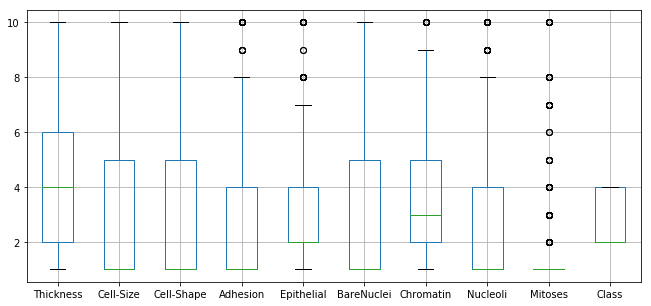

In [477]:
boxplot = dataset.boxplot(figsize=(11, 5))

Para los datos atípicos, se procederá a eliminarlos del conjunto de datos.

In [478]:
mediaDataset = dataset.mean()
desviacionEstandarDataset=dataset.std()

outlier = list()
for i in dataset:
    threshold = 3
    linea = 0
    for y in dataset[i]:
        z = (y - mediaDataset[i]) / desviacionEstandarDataset[i]
        if abs(z) > threshold and linea not in outlier:
            outlier.append(linea)
        linea += 1
        
dataset.drop(outlier,inplace = True)

<h1>Preparar los datos</h1>

A continuación se dividirán los datos en dos conjuntos, uno sera para el entrenamiento de los modelos el cual tendrá un 70% del total de los datos y el segundo sera para las pruebas y constara con el 30% restante de los dato.

In [479]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Luego mostrare cuántos datos de cada clase quedaron en cada uno de los dos conjuntos para asegurarse que todas las clases estén representadas en cada uno de ellos.

In [480]:
def visualizar(conjunto):
    
    benigno = 0
    malgino = 0
    
    for i in conjunto:
        if i == 2:
            benigno += 1
        else:
            malgino += 1
    print("Datos de la clase benigno", benigno)
    print("Datos de la clase negativo", malgino)

Primero para el conjunto de entrenamiento:

In [481]:
visualizar(y_train)

Datos de la clase benigno 324
Datos de la clase negativo 129


Y luego para el conjunto de pruebas:

In [482]:
visualizar(y_test)

Datos de la clase benigno 131
Datos de la clase negativo 64


<h1>Primera técnica: Maquina de vectores de soporte</h1>

Esta técnica de aprendizaje automatico no ayudara gracias a que el problema es de clasificación binaria, por lo que debemos buscar un hiperplano que divida los datos en dos para poder clasificarlos. En este caso, los datos no son linealmente separables por lo que se busca un tipo de kernel que nos de un mejor resultado y a su vez definiremos un C el cual nos controla la compensación entre errores de entrenamiento y los márgenes rígidos. El parámetro C nos indica la constante que tan flexible puede ser ese hiperplano al momento de dividir los datos.

Para ver cual es el Kernel se desempeña mejor, es preciso probar con cada uno y seleccionar el que mejor tenga resultados con este conjunto de datos con respecto a la exactitud(accuracy) que obtenga:

1. KERNEL LINEAL:

In [483]:
svcLinear = SVC(kernel='linear',gamma='scale', C=1)
svcLinear.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [496]:
print('Exactitud:',"{0:.0f}%".format(svcLinear.score(X_test,y_test) * 100) )

Exactitud: 96%


2. KERNEL POLINOMIAL

In [486]:
svcPolinomial = SVC(kernel='poly',gamma='scale', C=1,degree=5)
svcPolinomial.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Evaluación:

In [497]:
print('Exactitud:',"{0:.0f}%".format(svcPolinomial.score(X_test,y_test) * 100) )

Exactitud: 93%


3. KERNEL SIGMOIDAL

In [488]:
svcSigmoidal = SVC(kernel='sigmoid',gamma='scale', C=1)
svcSigmoidal.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Evaluación:

In [498]:
print('Exactitud:',"{0:.0f}%".format(svcSigmoidal.score(X_test,y_test) * 100) )

Exactitud: 56%


4. KERNEL GAUSSIANO

In [490]:
svcGaussian = SVC(kernel='rbf',gamma='scale', C=1)
svcGaussian.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Evaluación:

In [495]:
print('Exactitud:',"{0:.0f}%".format(svcGaussian.score(X_test,y_test) * 100) )

Exactitud: 96%


Si comparamos el desempeño de cada uno de los Kernel, podemos ver claramente que el sigmoide es el peor, los otros 3 no difieren en mucho por lo que vamos a usar el kernel lineal para hacer nuestra maquina de vectores de soporte.

<h1>Segunda técnica: Árbol de decisiones</h1>

Gracias a que esta técnica nos permite clasificar la usaremos para este problema.

Es importante para esta técnica, obtener el árbol optimo y valorar cada subdivisión que este hace. Para medir y valorar vamos a usar el indice gini y la ganancia de información usando la entropía.

1. INDICE GINI

In [460]:
adGini = DecisionTreeClassifier(criterion='gini', max_depth=4)
adGini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [499]:
print('Exactitud:',"{0:.0f}%".format(adGini.score(X_test,y_test) * 100) )

Exactitud: 98%


2. GANACIA DE INFORMACION

In [493]:
adEntropia = DecisionTreeClassifier(criterion='entropy', max_depth=3)
adEntropia.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [500]:
print('Exactitud:',"{0:.0f}%".format(adEntropia.score(X_test,y_test) * 100) )

Exactitud: 93%


Como podemos observar, los resultados de ambos en cuanto a su desempeño es muy similar así que en este caso usaremos indice gini como herramienta que nos ayude a darle valor a la información. Es posible que con diferentes conjuntos de datos cambie el desempeño de ambos modelos pero en este caso tomaremos este indice.

<h1>Análisis de los resultados y Conclusiones</h1>


Para evaluar el desempeño de cada modelo y poder comparar cual era mejor entre ellos, usamos la matriz de confusión, ya que nos permite tener una mejor idea de como esta clasificando nuestro algoritmo, a partir de un conteo de los aciertos y errores en el proceso de clasificar las 2 clases.

- Maquina de vectores de soporte: Kernel lineal

Matriz de confusión:

In [449]:
visualizar(y_test)
print(confusion_matrix(y_test, svcLinear.predict(X_test)))

Datos de la clase benigno 143
Datos de la clase negativo 52
[[141   2]
 [  3  49]]


Posicion 0 , 0 : Predijo que eran benignos y si pertenecian a esa clase

Posicion 0 , 1 : Predijo que eran benignos y no pertenecian a esa clase

Posicion 1 , 0 : Predijo que eran malignos y no pertenecian a esa clase

Posicion 1 , 1 : Predijo que eran malignos y si pertenecian a esa clase

A partir de esta información podemos calcular lo siguiente:

In [470]:
print(classification_report(y_test, adGini.predict(X_test)))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98       143
           4       0.93      0.96      0.94        52

   micro avg       0.97      0.97      0.97       195
   macro avg       0.96      0.97      0.96       195
weighted avg       0.97      0.97      0.97       195



- Arbol de desición : Indice Gini

Igual que en la anterior técnica se usara la matriz de confusión para el análisis del desempeño del modelo.

In [502]:
print(confusion_matrix(y_test, adGini.predict(X_test)))

[[128   3]
 [  1  63]]


A partir de esta información podemos calcular lo siguiente:

In [501]:
print(classification_report(y_test, adGini.predict(X_test)))

              precision    recall  f1-score   support

           2       0.98      0.92      0.95       131
           4       0.85      0.97      0.91        64

   micro avg       0.93      0.93      0.93       195
   macro avg       0.92      0.94      0.93       195
weighted avg       0.94      0.93      0.93       195



Ademas, podemos analizar gráficamente como el árbol escoge dependiendo de los valores que toman ciertos atributos la clasificación que deben de ir tomando los datos que le entren.

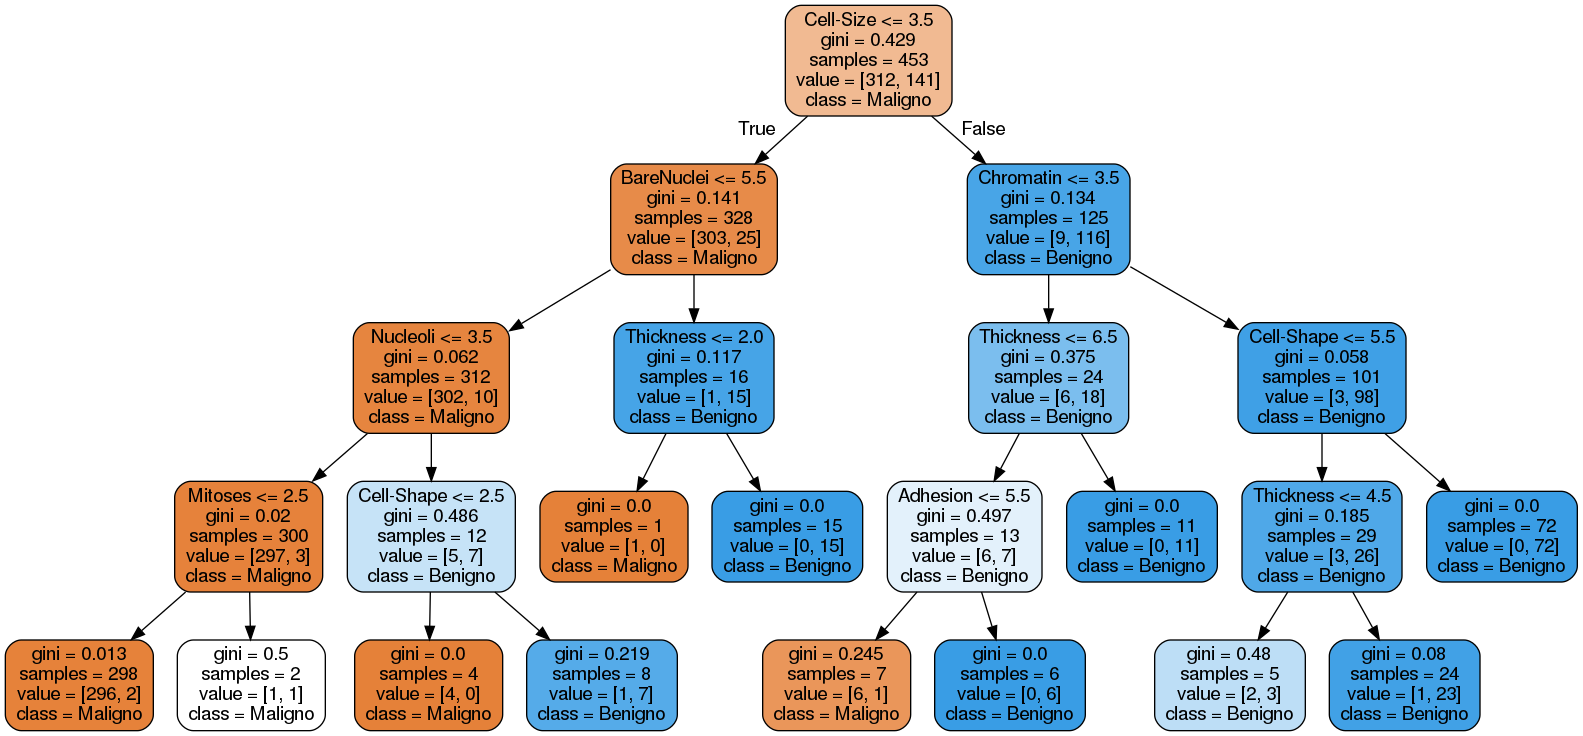

In [504]:
with open(r"tree1.dot", 'w') as f:
     f = export_graphviz(adGini,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = list(X),
                              class_names = ['Maligno', 'Benigno'],
                              rounded = True,
                              filled= True )
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

A partir de los resultados obtenidos podemos concluir que ambas técnicas se desarrollan de manera eficiente para resolver el problema de diagnosticar si un tumor que está en el seno es benigno o maligno. Aunque hay que resaltar que el conjunto de datos que nos brindan es un poco pequeño, si este fuera más grande los resultados de ambas técnicas seria mucho más preciso.